# Chapter 5 - 행렬, 파트2: 행렬의 확장 개념

In [1]:
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 5-3. 대각합 연산과 유클리드 공식 동일하다는 것 구현

In [2]:
# A = np.arange(4).reshape(2, 2)
# 1부터 10까지 정수 중 랜덤하게 추출하여 2*2 행렬 생성
A = np.random.randint(1, 10, (2, 2))
A

array([[1, 2],
       [4, 5]])

In [3]:
# 프로베니우스 노름 (=유클리드 공식의 결과)
frobenius = np.linalg.norm(A)
frobenius

6.782329983125268

In [4]:
# A의 전치 행렬 구한다
aTa = np.dot(A, A)

# 전치행렬의 대각합 (trace) 구해서 루트 씌운다
np.sqrt(np.trace(aTa))

6.48074069840786

In [5]:
# l2 norm과 전치행렬의 대각합에 루트 씌운 것 동일한지 확인
frobenius == np.sqrt(np.trace(aTa))

False

## 5-4. 행렬 이동이 행렬 노름에 미치는 영향 알아본다
1. 10*10 난수 행렬 만들고 프로베니우스 노름 계산
2. for 문 내부에 다음 단계 코딩
    1. 노름의 일부 만큼 행렬 이동
        - 이동시킬 값인 노름의 비율은 0 ~ 1 사이를 30계의 단계로 나누어 진행
        - 루프의 각 반복에서는 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용
    2. 원래 행렬에서 노름의 변화율 계산
    3. 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리 계산
    4. 행렬의 원소 사이의 상관계수 계산
        - `np.flatten()` 사용해서 벡터화된 행렬의 상관관계 계산


In [6]:
# 10*10 난수 행렬 생성
matrix = np.random.randn(10, 10)
frobenius = np.linalg.norm(matrix)

print("행렬 크기 :", matrix.shape)
print("프로베니우스 노름 :", frobenius)

행렬 크기 : (10, 10)
프로베니우스 노름 : 11.381502788742557


In [7]:
def translate_change_rate_corrcoeff(matrix, rates_num=30):

    # 이동시킬 값인 노름의 비율
    rates = np.linspace(0, 1, num=rates_num)
    
    # 변화율, 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리, 행렬의 원소 사이의 상관계수 담을 리스트 생성
    change_rate_list = []
    frobenius_between_list = []
    corrcoef_list = []

    # 노름의 일부 만큼 행렬을 이동
    for rate in rates:
        # 노름의 일부 : frobenius * rate
        translated = matrix + ((frobenius * rate) * np.eye(10))
        
        # 원래 행렬에서 노름의 변화율 계산
        change_rate = ((np.linalg.norm(translated) - frobenius) / frobenius) * 100

        # 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리를 계산
        frobenius_between = np.linalg.norm(matrix - translated)

        # 행렬의 원소 사이의 상관계수 계산
        corrcoef = np.corrcoef(matrix.flatten(), translated.flatten())[0, 1]

        change_rate_list.append(change_rate)
        frobenius_between_list.append(frobenius_between)
        corrcoef_list.append(corrcoef)
    
    # 그래프에 사용할 데이터와 y축 레이블
    data_lists = [change_rate_list, corrcoef_list, frobenius_between_list]
    y_labels = ["노름 변화율(%)", "원래 행렬과의 상관 계수", "프로베니우스 거리"]

    # 1*3 크기의 subplots 생성
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))

    # for loop를 이용하여 각 subplot에 그래프 생성
    for i, ax in enumerate(axs):
        ax.plot(rates, data_lists[i], marker="s", color="r", markersize=3)
        ax.set_xlabel("이동(노름 비율)")
        ax.set_ylabel(y_labels[i])

    plt.tight_layout()
    plt.show()

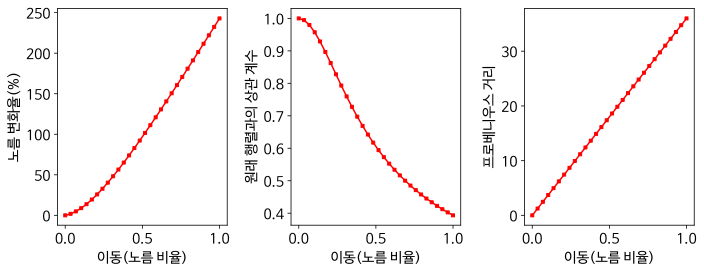

In [8]:
translate_change_rate_corrcoeff(matrix)

## 5-5. 계수가 r인 행렬을 만들려면 난수 M * r 행렬에 r * N 행렬을 곱하는지 구현하고 계수가 실제로 r인지 확인

In [9]:
# 임의의 숫자 M, N 생성
M = np.random.randint(1, 5)
N = np.random.randint(1, 5)

print("M :", M)
print("N :", N)

M : 2
N : 1


In [10]:
# 행렬의 최대로 가능한 계수 r = min{M, N}
r = min(M, N)
print("r :", r)

r : 1


In [11]:
# 난수 M * r 행렬 생성
Mxr = np.random.randn(M, r)

# 난수 r * M 행렬 생성
rxN = np.random.randn(r, N)

In [12]:
# 난수 M * r 행렬에 난수 r * M 행렬을 곱함
MxN = np.dot(Mxr, rxN)
MxN

array([[-0.11580437],
       [-0.03825337]])

In [13]:
# MxN 행렬의 계수가 실제로 r인지 확인
r == np.linalg.matrix_rank(MxN)

True

In [14]:
# 만약 r > min{M, N}이라면?
r_edited = r + 2
print("min{M, N}보다 큰 r 값 :", r_edited)

min{M, N}보다 큰 r 값 : 3


In [15]:
# 난수 M * r_edited 행렬 생성
Mxr_edited = np.random.randn(M, r_edited)

# 난수 r_edited * M 행렬 생성
r_edited_xM = np.random.randn(r_edited, N)

In [16]:
MxN_edited = np.dot(Mxr_edited, r_edited_xM)
MxN_edited

array([[-0.34047354],
       [-0.35861456]])

In [17]:
# r_edited (r+2)를 넣어서 행렬을 생성하고 rank를 확인했는데 r과 똑같다? (문제가 있나?)
r == np.linalg.matrix_rank(MxN_edited)

True

## 5-6. 행렬 계수 r(A+B) <= r(A) + r(B) 구현

In [18]:
# 더한 결과가 계수-0 행렬
a_0 = np.array([[1, 0],
                [1, 1]])
b_0 = np.array([[-1, 0],
                [-1, -1]])

# 더한 결과가 계수-1 행렬
a_1 = np.array([[1, 0],
                [1, 1]])
b_1 = np.array([[0, 1],
                [0, 0]])

# 더한 결과가 계수-2 행렬
a_2 = np.array([[1, 0],
                [1, 1]])
b_2 = np.array([[1, 0],
                [1, 0]])

# 각 쌍을 더한 행렬
a_0_b_0= a_0 + b_0
a_1_b_1 = a_1 + b_1
a_2_b_2 = a_2 + b_2

In [19]:
print("두 행렬을 더한 결과의 계수 :", np.linalg.matrix_rank(a_0 + b_0))
print("두 행렬을 더한 결과의 계수 :", np.linalg.matrix_rank(a_1 + b_1))
print("두 행렬을 더한 결과의 계수 :", np.linalg.matrix_rank(a_2 + b_2))

두 행렬을 더한 결과의 계수 : 0
두 행렬을 더한 결과의 계수 : 1
두 행렬을 더한 결과의 계수 : 2


In [20]:
# 덧셈 법칙 구현
np.linalg.matrix_rank(a_0_b_0) <= (np.linalg.matrix_rank(a_0) + np.linalg.matrix_rank(b_0))

True

In [21]:
np.linalg.matrix_rank(a_1_b_1) <= (np.linalg.matrix_rank(a_1) + np.linalg.matrix_rank(b_1))

True

In [22]:
np.linalg.matrix_rank(a_2_b_2) <= (np.linalg.matrix_rank(a_2) + np.linalg.matrix_rank(b_2))

True

In [23]:
# 곱셈 법칙 구현
np.linalg.matrix_rank(np.dot(a_0, b_0)) <= min(np.linalg.matrix_rank(a_0), np.linalg.matrix_rank(b_0))

True

In [24]:
np.linalg.matrix_rank(np.dot(a_1, b_1)) <= min(np.linalg.matrix_rank(a_1), np.linalg.matrix_rank(b_1))

True

In [25]:
np.linalg.matrix_rank(np.dot(a_2, b_2)) <= min(np.linalg.matrix_rank(a_2), np.linalg.matrix_rank(b_2))

True

## 5-7. 개별 행렬의 계수 함수로 시각화
1. 연습문제 5-5의 코드를 매개변수 M과 r을 입력으로 받아 계수-r인 M*M 난수 행렬을 출력하는 파이썬 함수에 넣는다
2. 이중 for loop에서 2 ~ 15까지의 각 계수를 갖는 20*20 행렬 쌍을 만든다
3. 이 행렬을 더한 결과 행렬의 계수와 곱한 결과 행렬의 계수 저장
4. 이 계수를 행렬로 만들어서 개별 행렬의 계수 함수로 시각화

In [26]:
# rank-r인 난수 행렬을 출력하려면, 5-5에서 했던 M*r, r*M 행렬을 만들어 곱한다

def rank_r_matrix(M, r):

    # 난수 M * r 행렬 생성
    Mxr = np.random.randn(M, r)

    # 난수 r * M 행렬 생성
    rxM = np.random.randn(r, M)

    matrix = np.dot(Mxr, rxM)
    return matrix

In [27]:
def plus_and_multiply_ranks_matrix(matrix_size, max_range):
    ranges = np.arange(2, max_range)

    plus_matrix = np.zeros((len(ranges), len(ranges)))
    multiply_matrix = np.zeros((len(ranges), len(ranges)))

    for i in range(len(ranges)):
        for j in range(len(ranges)):
            plus = rank_r_matrix(matrix_size, ranges[i]) + rank_r_matrix(matrix_size, ranges[j])
            multiply = np.dot(rank_r_matrix(matrix_size, ranges[i]), rank_r_matrix(matrix_size, ranges[j]))

            plus_matrix[i, j] = np.linalg.matrix_rank(plus)
            multiply_matrix[i, j] = np.linalg.matrix_rank(multiply)

    title_lists = ["A+B의 계수", "A@B의 계수"]

    # 1*2 크기의 subplots 생성
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # for loop을 이용하여 각 subplots에 그래프 생성
    for i, ax in enumerate(axes):
        if i == 0:
            data = plus_matrix
        else:
            data = multiply_matrix
        ax.imshow(data,
            origin='lower',
            vmin=np.min(ranges),
            vmax=np.max(ranges),
            extent=(ranges[0],ranges[-1],ranges[0],ranges[-1])
            )
        ax.set_xlabel("A의 계수")
        ax.set_ylabel("B의 계수")
        ax.set_title(title_lists[i])

    plt.tight_layout()
    plt.show()


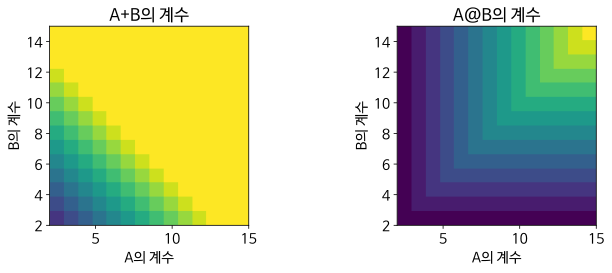

In [28]:
plus_and_multiply_ranks_matrix(20, 16)

## 5-8. 행렬 A, A.T, A.T@A, A@A.T의 계수는 모두 동일

In [29]:
def compare_rank_of_matrix(nrows, ncols):

    A = np.random.randn(nrows, ncols)
    rank_A = np.linalg.matrix_rank(A)
    rank_A_T = np.linalg.matrix_rank(A.T)
    rank_A_T_A = np.linalg.matrix_rank(A.T @ A)
    rank_A_A_T = np.linalg.matrix_rank(A @ A.T)

    print("rank_A :", rank_A)
    print("rank_A_T :", rank_A_T)
    print("rank_A_T_A :", rank_A_T_A)
    print("rank_A_A_T :", rank_A_A_T)

In [30]:
# 정방행렬인 경우 Rank 비교
compare_rank_of_matrix(2, 2)

rank_A : 2
rank_A_T : 2
rank_A_T_A : 2
rank_A_A_T : 2


In [31]:
# 높은 (tall) 행렬인 경우 Rank 비교
compare_rank_of_matrix(3, 2)

rank_A : 2
rank_A_T : 2
rank_A_T_A : 2
rank_A_A_T : 2


In [32]:
# 넓은 (fat) 행렬인 경우 Rank 비교
compare_rank_of_matrix(2, 5)

rank_A : 2
rank_A_T : 2
rank_A_T_A : 2
rank_A_A_T : 2


## 5-9. v가 C(A)에 속하는지 답을 구한다
1. 정규 분포에서 무작위로 추출한 숫자를 사용하여 Rank-3 행렬 $A \in \mathbb{R}^{4 \times 3}$과 벡터 $v \in \mathbb{R}^{4}$를 만든다
2. 벡터가 행렬의 열공간에 있는지 여부를 확인한다
3. 코드를 여러번 실행해서 일관된 패턴을 보이는지 확인한다
4. 그런 다음, $A \in \mathbb{R}^{4\times4}$ Rank-4 행렬 사용
5. $A$가 $4 \times 4$ 난수 행렬일 때, 항상 $ v \in C(A)$를 찾을 수 있다고 확신한다 
6. 테스트 결과에 따라 `True` `False`를 반환하고 벡터 크기가 확장된 행렬과 일치하지 않을 때 예외 (유용한 오류 메시지) 발생

In [33]:
# rank-r인 난수 행렬을 출력하려면, 5-5에서 했던 M*r, r*M 행렬을 만들어 곱한다

def rank_r_matrix(M, r):

    # 난수 M * r 행렬 생성
    Mxr = np.random.randn(M, r)

    # 난수 r * M 행렬 생성
    rxM = np.random.randn(r, M)

    matrix = np.dot(Mxr, rxM)
    return matrix

In [34]:
def is_vector_in_column_space(A, v):

    # 벡터 크기가 확장된 행렬과 일치하지 않았을 때, 예외 (유용한 오류 메시지 발생)
    # A와 A_augmented row 수가 같기 때문에, A_augmented 계산 전에 벡터의 차원과 A의 row 수 비교한다
    # 행렬을 확장할 때 열로 확장하기 때문에, 행의 개수는 변함이 없기 때문

    if A.shape[0] != v.shape[0]:
        raise Exception("에러 : 벡터 크기가 확장된 행렬과 일치하지 않습니다!")

    # 벡터가 행렬의 열공간에 존재하는지 여부 확인 (행렬 확장 활용)

    # 1. 벡터로 행렬을 확장한다 (A_augmented)
    A_augmented = np.append(A, v, axis=1)

    # 2. rank(A)와 rank(A_augmented) 비교
    # → rank(A) < rank(A_augmented) : 벡터 v는 행렬 A의 열공간에 없다 (False)
    return np.linalg.matrix_rank(A) >= np.linalg.matrix_rank(A_augmented)
    

In [35]:
# Rank-3 행렬 A (4*3)
A = rank_r_matrix(4, 3)

# 난수 벡터 v
v = np.random.randn(4, 1)

# 벡터 v가 행렬의 열공간에 없을 때
is_vector_in_column_space(A, v)

False

In [36]:
# Rank-3 행렬 A (4*4)
A = rank_r_matrix(4, 4)

# 난수 벡터 v
v = np.random.randn(4, 1)

# 벡터 v가 행렬의 열공간에 있을 때
is_vector_in_column_space(A, v)

True

In [37]:
# Rank-3 행렬 A (4*4)
A = rank_r_matrix(4, 4)

# 난수 벡터 v (5*1)
v = np.random.randn(5, 1)

# 벡터 크기가 확장된 행렬과 일치하지 않았을 때, 예외 (유용한 오류 메시지 발생)
is_vector_in_column_space(A, v)

Exception: 에러 : 벡터 크기가 확장된 행렬과 일치하지 않습니다!